In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_resp.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_stim.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_resp.xlsx' ]


paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_resp.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_resp.xlsx']

In [3]:
df_target=[]
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)


In [4]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [5]:
#### Hay que substract!

In [6]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-6.452111,ips,n001,2_0.2,tf,target,stim,far
1,2.335,-5.357404,ips,n001,2_0.2,tf,target,stim,far
2,4.670,2.072382,ips,n001,2_0.2,tf,target,stim,far
3,7.005,10.049902,ips,n001,2_0.2,tf,target,stim,far
4,9.340,7.811707,ips,n001,2_0.2,tf,target,stim,far


In [7]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-0.470339,visual,d001,1_0.2,IEM target,IEM,far,target
1,2.335,-0.465293,visual,d001,1_0.2,IEM target,IEM,far,target
2,4.670,0.306104,visual,d001,1_0.2,IEM target,IEM,far,target
3,7.005,0.230864,visual,d001,1_0.2,IEM target,IEM,far,target
4,9.340,-0.279853,visual,d001,1_0.2,IEM target,IEM,far,target


In [8]:
5*2.335
df.loc[(df['region']=='visual') &  (df['times']==9.34)]
df_shuff.loc[(df_shuff['region']=='visual') &  (df_shuff['times']==9.34)]

9.34

In [15]:
5*2.335

11.675

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


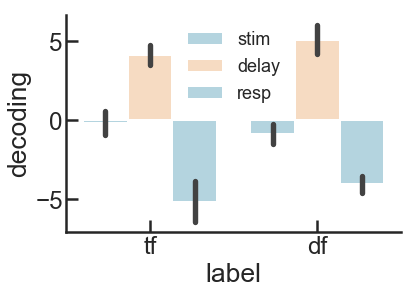

In [16]:
dfn = df.loc[(df['region']=='pfc') &  (df['times']==11.675) ]

sns.barplot(x='label', y='decoding', hue='trained', data=dfn, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()


In [ ]:
## Colapsandolo todo: Condition y area
sns.barplot(x='label', y='decoding', hue='trained', data=df, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()